# Лабораторная работа

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [131]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Аналитик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

sleep(0.5)

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data['items']

[{'id': '98781210',
  'premium': False,
  'name': 'Руководитель отдела экономической безопасности',
  'department': None,
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': None,
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': {'city': 'Москва',
   'street': 'Романов переулок',
   'building': '4с2',
   'lat': 55.754568,
   'lng': 37.609586,
   'description': None,
   'raw': 'Москва, Романов переулок, 4с2',
   'metro': None,
   'metro_stations': [],
   'id': '14293014'},
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2024-05-13T12:10:22+0300',
  'created_at': '2024-05-13T12:10:22+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98781210',
  'show_logo_in_search': None,
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/98781210?host=hh.ru',
  'alternate_url': 'https://hh.ru/vacancy/98

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [132]:
# your code here
URL = 'https://api.hh.ru/vacancies'

arr = [{
        'text': "Аналитик",
        'area': 1,
        'page': 0,
        'per_page': 100
      },
      {
        'text': "Дизайнер",
        'area': 1,
        'page': 0,
        'per_page': 100
      },
      {
        'text': "Хореограф",
        'area': 1,
        'page': 0,
        'per_page': 100
      },
      {
        'text': "Маникюрщица",
        'area': 1,
        'page': 0,
        'per_page': 100
      },
      {
        'text': "Космонавт",
        'area': 1,
        'page': 0,
        'per_page': 100
      }
]

data = [list()] * 5

for i in range(5):
    cnt = requests.get(URL, arr[i]).json()['pages']
    for j in range(cnt):
      arr[i]['pages'] = j
      data[i] += requests.get(URL, arr[i]).json()['items']
    sleep(0.5)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [133]:
sum = 0
for elem in data:
  sum += len(elem)

sum

20745

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [134]:
class Company:
    def __init__(self, name, lat, lng):
      self.name = name
      self.lat = lat
      self.lng = lng

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [135]:
companies = []
for i in data:
  for vac in i:
    if vac['address'] and vac['address']['lat'] and vac['address']['lng']:
      companies.append(Company(vac['employer']['name'], vac['address']['lat'], vac['address']['lng']))
    else:
      companies.append(Company(vac['employer']['name'], 0, 0))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [136]:
vac_with_address = 0
for i in companies:
  if i.lat > 0 and i.lng > 0:
    vac_with_address += 1
vac_with_address

9530

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [137]:
vac_in_msc = 0
coord = {'x_coord': [], 'y_coord': []}
for i in companies:
  if 55.648796 < i.lat < 55.894300 and 37.365883 < i.lng < 37.848630:
    vac_in_msc += 1
    coord['x_coord'].append(i.lat)
    coord['y_coord'].append(i.lng)
vac_in_msc

8815

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

<Axes: xlabel='x_coord', ylabel='y_coord'>

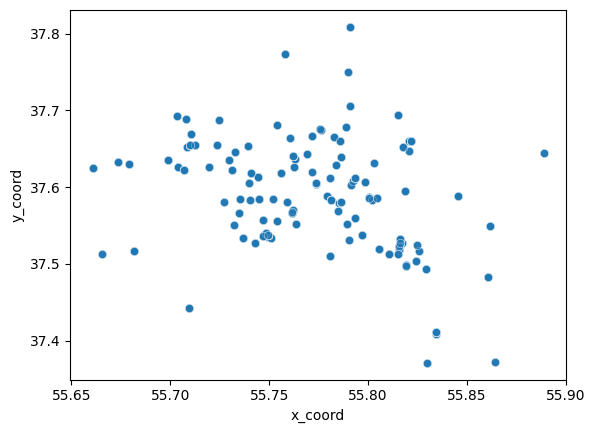

In [138]:
import seaborn as plt
plt.scatterplot(data = coord, x = 'x_coord', y = 'y_coord', alpha = 0.5)

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [139]:
import plotly.express as px

vac = {'lat': [],'lon': [], 'name': [], 'earn': []}
for i in data:
  for j in i:
    if j['address'] and j['address']['lat'] and j['address']['lng']:
       if(55.648796 < j['address']['lat'] < 55.894300) and (37.365883 < j['address']['lng'] < 37.848630):
          vac['lat'].append(j['address']['lat'])
          vac['lon'].append(j['address']['lng'])
          vac['name'].append(j['professional_roles'][0]['name'])
          if isinstance(j['salary'], dict):
            vac['earn'].append(j['salary']['from'])
          elif isinstance(j['salary'], int):
            vac['earn'].append(j['salary'])
          else:
            vac['earn'].append('dont know')

fig = px.scatter_mapbox(vac, lat="lat", lon="lon", hover_name="name", hover_data="earn",
                        zoom=5, height=400, center={"lat":55.4506, "lon":37.3704})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Вывод:
самый большой спрос работы в центре Москвы, меньше - в Северно

Вывод: самый большой спрос на работу в центре москвы, чуть меньше - в Северно-административном округе, в остальных районах совсем мало спросов. Более высокие зарплаты в центре Москвы. Очень много требуется дизайнеров, художников.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [3]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 97.1MB/s]


Создадим DataFrame:

In [109]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [89]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [90]:
diamonds.count()['color']

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [91]:
print(diamonds['total_sales_price'].idxmax(), '-', diamonds['total_sales_price'].max())
print(diamonds['total_sales_price'].idxmin(), '-', diamonds['total_sales_price'].min())

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [92]:
sum = 0
for i in diamonds.keys():
  for j in diamonds[i]:
    if j == 'unknown' or j == 'None':
      sum += 1
sum

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [93]:
for i in diamonds.keys():
  flag = False
  for j in diamonds[i]:
    if j == 'unknown' or j == 'None':
      flag = True
  if flag:
    print(i)

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [94]:
ans = 0
for i in diamonds.keys():
  if len(i) >= 12 and i[:12] == 'fancy_color_' or len(i) >= 6 and i[:6] == 'fluor_':
    ans += 1
ans

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [95]:
sum_info = 0
for i in diamonds.keys():
  if len(i) >= 12 and i[:12] == 'fancy_color_' or len(i) >= 6 and i[:6] == 'fluor_':
    for j in diamonds[i]:
      if j != 'None' and j != 'unknown':
          sum_info += 1
sum_info

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [110]:
for i in diamonds.keys():
  if len(i) >= 12 and i[:12] == 'fancy_color_' or len(i) >= 6 and i[:6] == 'fluor_':
    diamonds.pop(i)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [111]:
for i in diamonds.keys():
  if len(i) >= 6 and i[:6] == 'culet_':
    flag = False
    for j in diamonds[i]:
      if j == 'None' or j == 'unknown':
        flag = True
    if flag:
      diamonds.pop(i)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [98]:
max_cost = 0
for i in diamonds['total_sales_price']:
  max_cost += i
max_cost / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [99]:
diamonds.loc[diamonds.index % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [100]:
diamonds.loc[diamonds.index % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [101]:
new_diamonds = []
for i in diamonds:
  if isinstance(diamonds[i][0], str) == False:
    new_diamonds.append(i)
diamonds.drop(new_diamonds, axis = 1)

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [102]:
diamonds['total_sales_price'] @ diamonds['total_sales_price']

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

<Axes: xlabel='цвет', ylabel='стоимость'>

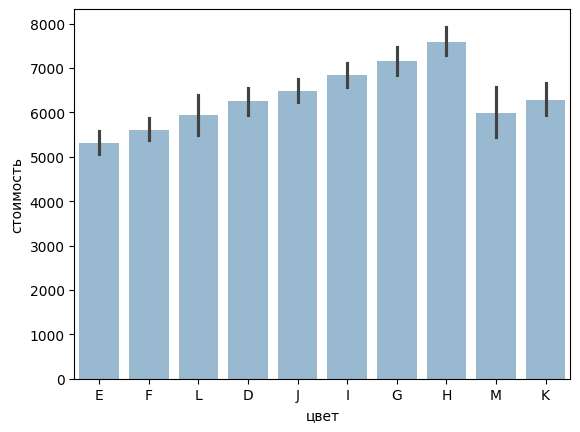

In [84]:
import seaborn as plt
color_cost = {'цвет': [], 'стоимость': []}
for i in range(len(diamonds['color'])):
  if diamonds['color'][i] != 'unknown':
      color_cost['цвет'].append(diamonds['color'][i])
      color_cost['стоимость'].append(diamonds['total_sales_price'][i])

plt.barplot(data = color_cost, x = 'цвет', y = 'стоимость', alpha = 0.5)

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

<Axes: xlabel='лабораторная оценка', ylabel='кол-во бриллиантов'>

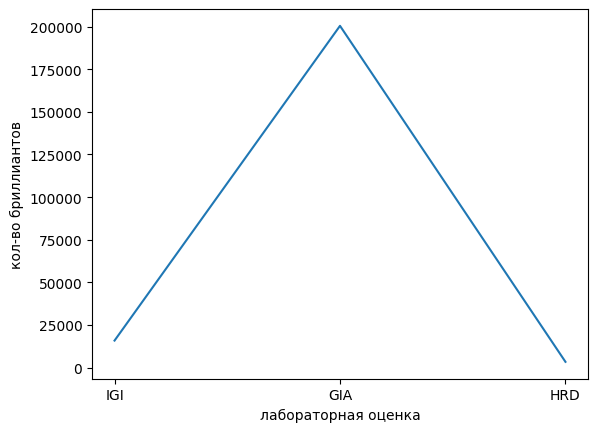

In [85]:
import seaborn as plt
lab_cnt = {'лабораторная оценка': [], 'кол-во бриллиантов': []}
laba = dict()
for i in diamonds['lab']:
  if i != 'unknown':
      if i in laba:
        laba[i] += 1
      else:
        laba[i] = 1
for i in laba.keys():
  lab_cnt['лабораторная оценка'].append(i)
  lab_cnt['кол-во бриллиантов'].append(laba[i])

plt.lineplot(data = lab_cnt, x = 'лабораторная оценка', y = 'кол-во бриллиантов')

(2 балла) Постройте график `вес бриллианта - стоимость`:

<Axes: xlabel='вес бриллианта', ylabel='стоимость'>

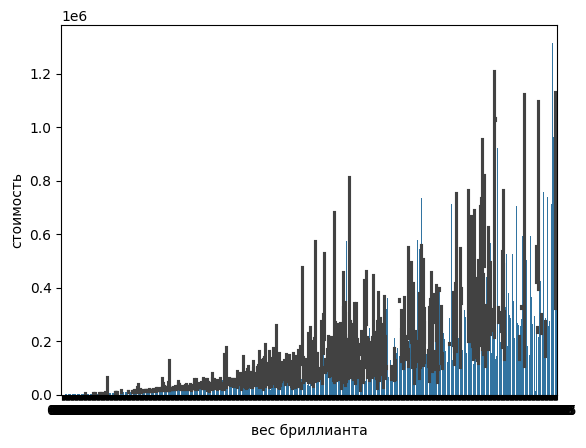

In [21]:
color_cost = {'вес бриллианта': [], 'стоимость': []}
for i in range(len(diamonds['carat_weight'])):
  if diamonds['carat_weight'][i] != 'unknown':
      color_cost['вес бриллианта'].append(diamonds['carat_weight'][i])
      color_cost['стоимость'].append(diamonds['total_sales_price'][i])

plt.barplot(data = color_cost, x = 'вес бриллианта', y = 'стоимость')

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

<Axes: xlabel='оценка качества', ylabel='кол-во бриллиантов'>

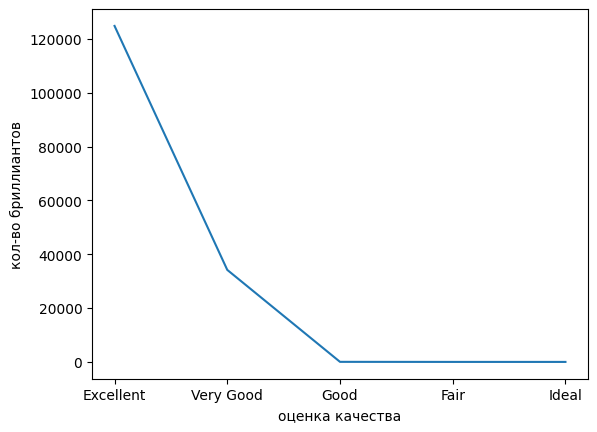

In [22]:
lab_cnt = {'оценка качества': [], 'кол-во бриллиантов': []}
laba = dict()
for i in diamonds['cut_quality']:
  if i != 'unknown':
      if i in laba:
        laba[i] += 1
      else:
        laba[i] = 1
for i in laba.keys():
  lab_cnt['оценка качества'].append(i)
  lab_cnt['кол-во бриллиантов'].append(laba[i])

plt.lineplot(data = lab_cnt, x = 'оценка качества', y = 'кол-во бриллиантов')

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Вывод: Самая высокая стоимость у брилиантов, цвет которых(H) - это что-то среднее между прозрачным и желтоватым. Самое большое количество брилиантов с лабораторной оценкой GIA. Чем больше вес бриллианта, тем больше стоимость. Самое большое количество бриллиантов с качеством Excellent.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [113]:
data_del = []
for i in diamonds:
  if i != 'meas_length' and i != 'meas_depth' and i != 'meas_width' and i != 'total_sales_price':
    data_del.append(i)
data = diamonds.drop(data_del, axis = 1)
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [114]:
data = data.sample(frac = 1)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [115]:
x = data['meas_length']
y = data['meas_depth']
z = data['meas_width']
data = data.assign(Minkowski_sum = (x ** 3 + y ** 3 + z ** 3) ** (1/ 3))
data

,meas_length,meas_width,meas_depth,total_sales_price,Minkowski_sum
163210,6.35,5.78,3.81,4989,7.960507
169533,5.09,5.12,3.18,5824,6.681268
189837,6.77,5.71,4.15,10345,8.281303
8152,3.87,3.89,2.33,580,5.058953
180180,6.37,6.40,3.98,8114,8.357073
...,...,...,...,...,...
32315,4.30,4.33,2.66,840,5.641097
128977,4.94,5.01,3.21,2818,6.537312
165586,5.99,6.05,3.70,5480,7.867720
9129,3.73,3.75,2.31,622,4.890358


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [116]:
new_data = data.drop(['meas_length', 'meas_width', 'meas_depth'], axis = 1)

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_data, test_size=0.2)
print(train_data)
print(test_data)

        total_sales_price  Minkowski_sum
124153               2554       6.626451
92707                1474       6.287936
108502               1876       7.184105
55301                 964       5.799315
87446                1320       0.000000
...                   ...            ...
57719                 972       5.566458
19821                 720       5.232611
102978               1690       6.786551
107540               1916       6.741301
177309               7836       7.836893

[175762 rows x 2 columns]
        total_sales_price  Minkowski_sum
3994                  516       5.615469
173497               6435       8.951555
216366              51840       7.430168
169698               5853       9.229614
44304                 890       5.600222
...                   ...            ...
41114                 882       5.392016
187537               9121       9.199125
174722               7137      10.609614
205547              19587       8.870691
64224                1014     

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

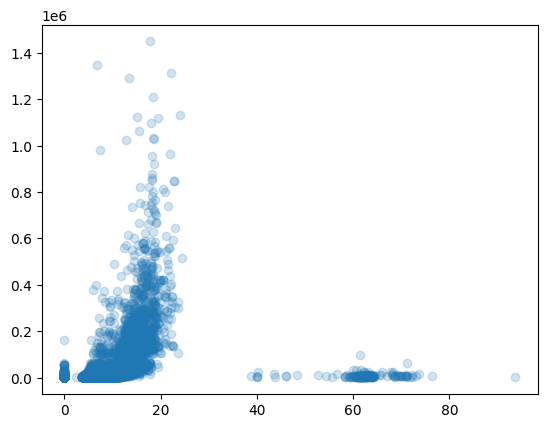

In [56]:
import matplotlib.pyplot as plt
graphic = plt.scatter(data = train_data, x = 'Minkowski_sum', y = 'total_sales_price', alpha = 0.2)

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

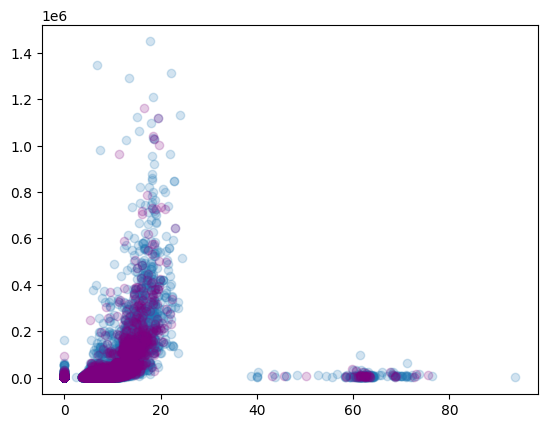

In [68]:
plt.scatter(data = train_data, x = 'Minkowski_sum', y = 'total_sales_price', alpha = 0.2)
plt.scatter(data = test_data, x = 'Minkowski_sum', y = 'total_sales_price', color = 'purple', alpha = 0.2)

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [37]:
from sklearn.neighbors import NearestNeighbors

train_sum = train_data['Minkowski_sum'].values.reshape(-1, 1)
train_price = train_data['total_sales_price'].values.reshape(-1, 1)
test_sum = test_data['Minkowski_sum'].values.reshape(-1, 1)
test_price = test_data['total_sales_price'].values.reshape(-1, 1)
ans = NearestNeighbors(n_neighbors = 1)
ans.fit(train_sum)
dist, ind = ans.kneighbors(test_sum)
print(dist)

[[0.00000000e+00]
 [6.75061784e-05]
 [6.30224174e-05]
 ...
 [7.64330623e-05]
 [6.08762428e-05]
 [0.00000000e+00]]


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [120]:
percent = []
for j in range(len(dist)):
  x1 = train_price[ind[j]]
  y1 = test_price[j]
  percent.append((abs(x1 - y1)) / y1 * 100)
for i in range(5):
  print(percent[i])

[[99.6124031]]
[[81.3986014]]
[[99.26697531]]
[[426.99470357]]
[[24.04494382]]


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [121]:
from sklearn.preprocessing import OneHotEncoder

delet = []
for i in diamonds:
  if i != 'color' and i != 'clarity' and i != 'total_sales_price':
    delet.append(i)
diamonds = diamonds.drop(delet, axis = 1)

categories = ['color', 'clarity']
enc = OneHotEncoder(handle_unknown='ignore')
enc_set = pd.DataFrame(enc.fit_transform(diamonds[categories]).toarray())
dataset = diamonds.join(enc_set)

dataset = dataset.drop(['color', 'clarity'], axis = 1)
dataset.head()

,total_sales_price,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [122]:
X = dataset.drop(['total_sales_price'], axis = 1)
y = dataset['total_sales_price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
print(train_x.head())
print(test_x.head())
print(train_y.head())
print(test_y.head())

         0    1    2    3    4    5    6    7    8    9   ...   12   13   14  \
200408  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
115976  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
82329   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
59494   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
154397  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         15   16   17   18   19   20   21  
200408  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
115976  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
82329   0.0  1.0  0.0  0.0  0.0  0.0  0.0  
59494   0.0  0.0  0.0  0.0  1.0  0.0  0.0  
154397  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 22 columns]
         0    1    2    3    4    5    6    7    8    9   ...   12   13   14  \
22387   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
25148   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [117]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(train_x, train_y)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [80]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, model.predict(test_x))
mse

694831152.1984935

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Вывод: я обучила модель по признакам: color и clarity. Ошибка получилась достаточно большой, поэтому оценивать стоимость бриллинтов по цвету и чистоте не стоит. Желательно опираться на большее число признаков в дальнейшем оценивании.
Работа с sklearn проста в использовании, всем советую!